In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('D:/ML_practice/MobilePrice_Classification/train.csv')

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
data_y=data['price_range']

In [6]:
data_y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [7]:
data_y.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [8]:
data_x=data.drop(['price_range'],axis=1)

In [9]:
data_x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
m_classifier = KNeighborsClassifier(n_neighbors=4)
m_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [12]:
predict=m_classifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[ 86   6   0   0]
 [  8 101   4   0]
 [  0   6  81   2]
 [  0   0  12  94]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        92
           1       0.89      0.89      0.89       113
           2       0.84      0.91      0.87        89
           3       0.98      0.89      0.93       106

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [14]:
data_test=pd.read_csv('D:/ML_practice/MobilePrice_Classification/test.csv')

In [15]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [16]:
data_test=data_test.drop(['id'],axis=1)

In [17]:
predict1=m_classifier.predict(data_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model_rndf = RandomForestClassifier()
model_rndf.fit(X_train, y_train)
predict2=model_rndf.predict(X_test)


In [20]:
print(model_rndf.score(X_train, y_train))
print(model_rndf.score(X_test, y_test))

1.0
0.9


In [21]:
X_test.shape

(400, 20)

In [22]:
y_test.shape

(400,)

Text(0, 0.5, 'Error Rate')

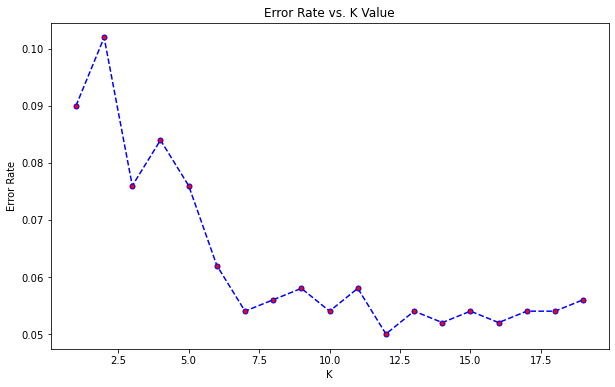

In [38]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')